In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def criar_dataframe_unificado_csv(caminho_pasta_principal):
    """
    Cria um DataFrame unificado a partir de todos os arquivos CSV
    encontrados nas subpastas de um caminho principal.

    Args:
        caminho_pasta_principal (str): O caminho para a pasta que contém as subpastas.

    Returns:
        pandas.DataFrame: Um DataFrame contendo a concatenação de todos os dados extraídos do arquivo CSV.
                          Retorna um DataFrame vazio se nenhum arquivo CSV for encontrado.
    """
    lista_dataframes = []

    for root, dirs, files in os.walk(caminho_pasta_principal):
        for nome_arquivo in files:
            if nome_arquivo.endswith(".csv"):
                caminho_arquivo = os.path.join(root, nome_arquivo)
                try:
                    df = pd.read_csv(caminho_arquivo, sep = ';', encoding='ISO-8859-1', on_bad_lines='skip', \
                    parse_dates=['Disponibilização', 'Data da intimação'], dayfirst=True)
                    lista_dataframes.append(df)
                    print(f"Arquivo lido com sucesso: {nome_arquivo}")
                except Exception as e:
                    print(f"Erro: {e}: {nome_arquivo}")

    if lista_dataframes:
        dataframe_unificado = pd.concat(lista_dataframes, ignore_index=True)
        return dataframe_unificado
    else:
        print(f"Não foram encontrados arquivos CSV em '{caminho_pasta_principal}' ou suas subpastas.")
        return pd.DataFrame()

In [16]:
 arquivos_do_eloy = '/content/drive/MyDrive/Datasets/eloy'
 df_unificado = criar_dataframe_unificado_csv(arquivos_do_eloy)

Arquivo lido com sucesso: MAR-20.csv
Arquivo lido com sucesso: MAI-20.csv
Arquivo lido com sucesso: NOV-20.csv
Arquivo lido com sucesso: OUT-20.csv
Arquivo lido com sucesso: AGO-20.csv
Arquivo lido com sucesso: JUN-20.csv
Arquivo lido com sucesso: SET-20.csv
Arquivo lido com sucesso: ABR-20.csv
Arquivo lido com sucesso: DEZ-20.csv
Arquivo lido com sucesso: JUL-20.csv
Arquivo lido com sucesso: FEV-20.csv
Arquivo lido com sucesso: JAN-20.csv
Arquivo lido com sucesso: JAN-18.csv
Arquivo lido com sucesso: NOV-18.csv
Arquivo lido com sucesso: FEV-18.csv
Arquivo lido com sucesso: JUN-18.csv
Arquivo lido com sucesso: JUL-18.csv
Arquivo lido com sucesso: AGO-18.csv
Arquivo lido com sucesso: MAI-18.csv
Arquivo lido com sucesso: DEZ-18.csv
Arquivo lido com sucesso: SET-18.csv
Arquivo lido com sucesso: ABR-18.csv
Arquivo lido com sucesso: OUT-18.csv
Arquivo lido com sucesso: MAR-18.csv
Arquivo lido com sucesso: DEZ-22.csv
Arquivo lido com sucesso: ABR-22.csv
Arquivo lido com sucesso: JAN-22.csv
A

In [3]:
df_unificado_dropado = df_unificado.drop(columns=['Data da intimação', 'Prazo processual', \
                                                  'Movimentação', 'Teor da intimação', 'Natureza da comunicação', \
                                                  'Situação', 'Tarjas'])
df_unificado_dropado.sort_values('Disponibilização', ascending=False, inplace=True)
df_unificado_dropado.reset_index(drop=True, inplace=True)

# Inclusão de colunas para análise de períodos
df_unificado_dropado['Ano'] = df_unificado_dropado['Disponibilização'].dt.year
df_unificado_dropado['Trimestre'] = df_unificado_dropado['Disponibilização'].dt.quarter
df_unificado_dropado['Ano-Trimestre'] = df_unificado_dropado['Ano'].astype(str) + '-' + df_unificado_dropado['Trimestre'].astype(str)

display(df_unificado_dropado.sample(5))

# Grava o dataframe em Excel
df_unificado_dropado.to_excel("eloy.xlsx", index=False)

,Número do processo,Foro,Vara,Especialização,Cargo,Disponibilização,Classe principal,Assunto principal,Recebido por,Ano,Trimestre,Ano-Trimestre
192922,1515003-96.2021.8.26.0223,Foro de Guarujá,2ª Vara Criminal,Criminal - 2ª VCrim,009º PROMOTOR DE JUSTIÇA,2021-11-03,Medidas Protetivas de Urgência (Lei Maria da P...,Decorrente de Violência Doméstica,CARLOS EDUARDO PEREZ FERNANDEZ,2021,4,2021-4
348165,0009355-25.2015.8.26.0223,Foro de Guarujá,3ª Vara Criminal,Criminal,007º PROMOTOR DE JUSTIÇA,2017-03-22,Ação Penal - Procedimento Ordinário,Roubo,MARCELO SANCHEZ LORENZO,2017,1,2017-1
365795,1008144-34.2015.8.26.0223,Foro de Guarujá,2ª Vara da Família e das Sucessões,Família,008º PROMOTOR DE JUSTIÇA,2016-03-18,Execução de Alimentos,Liquidação / Cumprimento / Execução,Ministério Público do Estado de São Paulo,2016,1,2016-1
147386,1501948-44.2022.8.26.0223,Foro de Guarujá,1ª Vara Criminal,Criminal,005º PROMOTOR DE JUSTIÇA,2022-10-05,Pedido de Busca e Apreensão Criminal,Tráfico de Drogas e Condutas Afins,NAYANE CIOFFI BATAGINI,2022,4,2022-4
16601,1504714-46.2017.8.26.0223,Foro de Guarujá,2ª Vara Criminal,NaN,NaN,2025-02-18,Inquérito Policial,Leve,Ministério Público do Estado de São Paulo,2025,1,2025-1


In [4]:
top_9_cargos = df_unificado_dropado['Cargo'].value_counts().nlargest(9)
lista_cargos = top_9_cargos.index.tolist()
display(top_9_cargos)

,count
Cargo,
004º PROMOTOR DE JUSTIÇA,65682
003º PROMOTOR DE JUSTIÇA,63830
008º PROMOTOR DE JUSTIÇA,53922
005º PROMOTOR DE JUSTIÇA,43688
007º PROMOTOR DE JUSTIÇA,43153
001º PROMOTOR DE JUSTIÇA,39934
009º PROMOTOR DE JUSTIÇA,33006
006º PROMOTOR DE JUSTIÇA,11816
002º PROMOTOR DE JUSTIÇA,11782


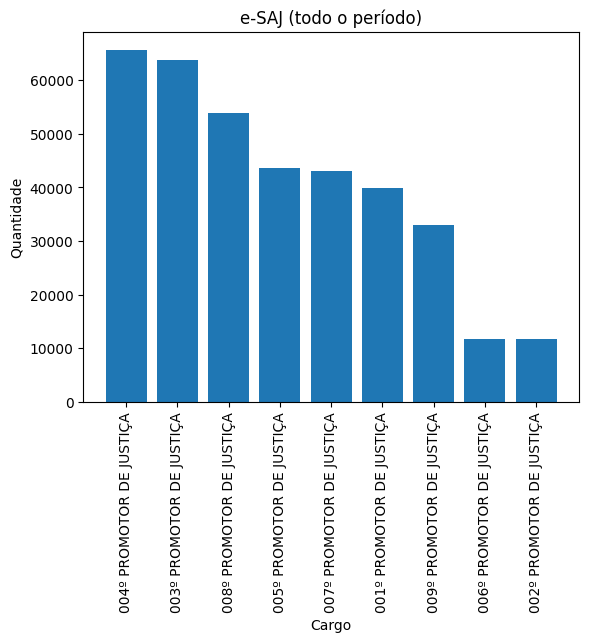

In [5]:
plt.bar(top_9_cargos.index, top_9_cargos)
plt.xlabel('Cargo')
plt.ylabel('Quantidade')
plt.title('e-SAJ (todo o período)')
plt.xticks(rotation=90)
plt.show()

In [6]:
top_12_recebedores = df_unificado_dropado['Recebido por'].value_counts().nlargest(12)
display(top_12_recebedores)

,count
Recebido por,
Ministério Público do Estado de São Paulo,55325
Daniel Gustavo Costa Martori,39095
Eloy Ojea Gomes,36209
DANIEL SANTERINI CAIADO,29802
CARLOS EDUARDO PEREZ FERNANDEZ,27546
sandra rodrigues de oliveira marzagão barbuto,22693
MARCELO SANCHEZ LORENZO,19410
Silvia de Freitas Denari,18843
Gustavo Roberto Costa,18559


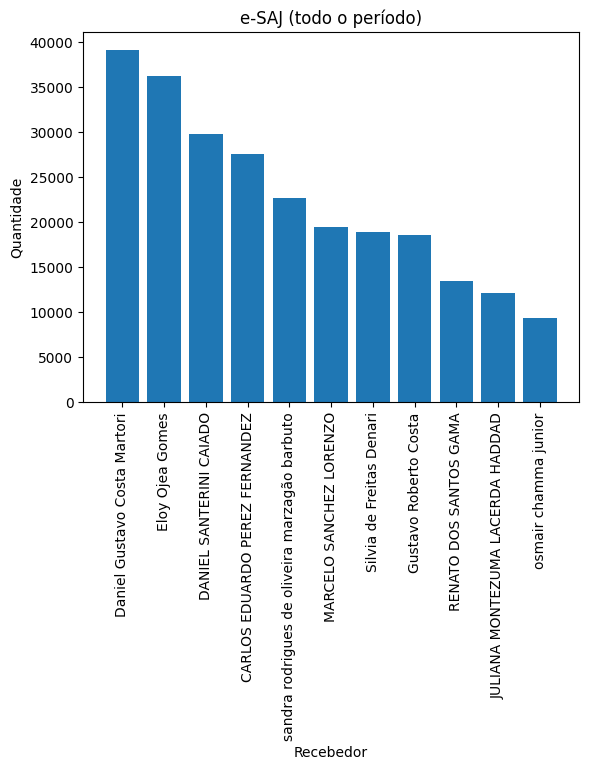

In [7]:
# Recebedores (excluindo o MP)
top_recebedores = top_12_recebedores[1:]
lista_recebedores = top_recebedores.index.tolist()

plt.bar(top_recebedores.index, top_recebedores)
plt.xlabel('Recebedor')
plt.ylabel('Quantidade')
plt.title('e-SAJ (todo o período)')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Filtrando o dataframe pela lista de cargos
df_filtrado_cargos = df_unificado_dropado[df_unificado_dropado['Cargo'].isin(lista_cargos)]

In [9]:
# Filtrando o dataframe pela lista de recebedores
df_filtrado_recebedores = df_unificado_dropado[df_unificado_dropado['Recebido por'].isin(lista_recebedores)]

In [10]:
df_filtrado_cargos.groupby(['Ano-Trimestre', 'Cargo'])['Cargo'].count().unstack(fill_value=0).to_csv('cargos.csv')
df_filtrado_recebedores.groupby(['Ano-Trimestre', 'Recebido por'])['Recebido por'].count().unstack(fill_value=0).to_csv('recebedores.csv')

In [11]:
display(df_filtrado_cargos.groupby(['Ano-Trimestre', 'Cargo'])['Cargo'].count().unstack(fill_value=0))

Cargo,001º PROMOTOR DE JUSTIÇA,002º PROMOTOR DE JUSTIÇA,003º PROMOTOR DE JUSTIÇA,004º PROMOTOR DE JUSTIÇA,005º PROMOTOR DE JUSTIÇA,006º PROMOTOR DE JUSTIÇA,007º PROMOTOR DE JUSTIÇA,008º PROMOTOR DE JUSTIÇA,009º PROMOTOR DE JUSTIÇA
Ano-Trimestre,,,,,,,,,
2014-4,3,17,3,1019,1,1,0,1220,0
2015-1,1,82,1,986,0,4,0,1055,2
2015-2,13,87,2,1014,1,15,0,1129,2
2015-3,6,96,6,1236,0,9,0,1277,0
2015-4,12,110,16,1253,4,23,7,1033,3
2016-1,89,122,187,927,40,28,105,940,24
2016-2,229,137,371,1232,114,44,185,1082,55
2016-3,321,128,607,1457,228,60,364,1263,134
2016-4,470,88,778,1208,266,82,392,1033,267


In [12]:
display(df_filtrado_recebedores.groupby(['Ano-Trimestre', 'Recebido por'])['Recebido por'].count().unstack(fill_value=0))

Recebido por,CARLOS EDUARDO PEREZ FERNANDEZ,DANIEL SANTERINI CAIADO,Daniel Gustavo Costa Martori,Eloy Ojea Gomes,Gustavo Roberto Costa,JULIANA MONTEZUMA LACERDA HADDAD,MARCELO SANCHEZ LORENZO,RENATO DOS SANTOS GAMA,Silvia de Freitas Denari,osmair chamma junior,sandra rodrigues de oliveira marzagão barbuto
Ano-Trimestre,,,,,,,,,,,
2014-4,0,0,15,1100,0,0,0,0,1133,0,0
2015-1,0,0,113,550,0,0,0,0,1087,1,0
2015-2,0,0,24,1137,0,0,0,0,766,0,0
2015-3,0,0,0,1273,0,0,0,0,1001,28,0
2015-4,2,0,11,1010,4,1,8,0,1257,106,0
2016-1,18,0,4,918,49,0,82,0,659,111,0
2016-2,23,0,0,1053,144,0,183,0,867,120,0
2016-3,92,0,0,912,213,0,342,0,1420,105,0
2016-4,184,0,0,896,236,0,403,0,1068,53,0


In [13]:
# prompt: crie um line chat com df_filtrado_cargos que mostre as ocorrências por cargos em cada trimestre. O usuário poderá selecionar quais cargos ele quer visualizar (crie o widget para isso). Após a seleção, um botão enter deverá fazer com que o gráfico seja exibido. Cade ver que clicar no botão, o antigo gráfico deve ser apagado

import ipywidgets as widgets
from IPython.display import display, clear_output

# Crie um widget de seleção múltipla para os cargos
cargo_selector = widgets.SelectMultiple(
    options=lista_cargos,
    description='Selecione os Cargos:',
    disabled=False
)

# Crie um botão para exibir o gráfico
exibir_grafico_button = widgets.Button(description="Exibir Gráfico")

# Crie um container para os widgets e o gráfico
output_widget = widgets.Output()

display(cargo_selector, exibir_grafico_button, output_widget)

def on_exibir_grafico_button_clicked(b):
    with output_widget:
        clear_output(wait=True) # Limpa o gráfico anterior
        selected_cargos = cargo_selector.value

        if not selected_cargos:
            print("Por favor, selecione pelo menos um cargo.")
            return

        # Filtrar o DataFrame com base nos cargos selecionados
        df_grafico = df_filtrado_cargos[df_filtrado_cargos['Cargo'].isin(selected_cargos)]

        # Agrupar e contar as ocorrências por Ano-Trimestre e Cargo
        df_grouped = df_grafico.groupby(['Ano-Trimestre', 'Cargo'])['Cargo'].count().unstack(fill_value=0)

        # Criar o gráfico de linhas
        plt.figure(figsize=(12, 6))
        for cargo in selected_cargos:
            if cargo in df_grouped.columns:
                plt.plot(df_grouped.index, df_grouped[cargo], marker='o', label=cargo)

        plt.xlabel('Ano-Trimestre')
        plt.ylabel('Número de Ocorrências')
        plt.title('Ocorrências por Cargo ao Longo do Tempo')
        plt.xticks(rotation=90)
        plt.legend(title='Cargo')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Associa a função ao clique do botão
exibir_grafico_button.on_click(on_exibir_grafico_button_clicked)

SelectMultiple(description='Selecione os Cargos:', options=('004º PROMOTOR DE JUSTIÇA', '003º PROMOTOR DE JUST…

Button(description='Exibir Gráfico', style=ButtonStyle())

Output()

In [14]:
# prompt: crie um line chat com df_filtrado_recebedores que mostre as ocorrências por recebedor em cada trimestre. O usuário poderá selecionar quais recebedores ele quer visualizar (crie o widget para isso). Após a seleção, um botão enter deverá fazer com que o gráfico seja exibido. Cade vez que o botão for clicado, o antigo gráfico deve ser apagado.

# Crie um widget de seleção múltipla para os recebedores
recebedor_selector = widgets.SelectMultiple(
    options=lista_recebedores,
    description='Selecione os Recebedores:',
    disabled=False
)

# Crie um botão para exibir o gráfico de recebedores
exibir_grafico_recebedor_button = widgets.Button(description="Exibir Gráfico")

# Crie um container para os widgets e o gráfico de recebedores
output_widget_recebedor = widgets.Output()

display(recebedor_selector, exibir_grafico_recebedor_button, output_widget_recebedor)

def on_exibir_grafico_recebedor_button_clicked(b):
    with output_widget_recebedor:
        clear_output(wait=True) # Limpa o gráfico anterior
        selected_recebedores = recebedor_selector.value

        if not selected_recebedores:
            print("Por favor, selecione pelo menos um recebedor.")
            return

        # Filtrar o DataFrame com base nos recebedores selecionados
        df_grafico_recebedor = df_filtrado_recebedores[df_filtrado_recebedores['Recebido por'].isin(selected_recebedores)]

        # Agrupar e contar as ocorrências por Ano-Trimestre e Recebedor
        df_grouped_recebedor = df_grafico_recebedor.groupby(['Ano-Trimestre', 'Recebido por'])['Recebido por'].count().unstack(fill_value=0)

        # Criar o gráfico de linhas
        plt.figure(figsize=(12, 6))
        for recebedor in selected_recebedores:
            if recebedor in df_grouped_recebedor.columns:
                plt.plot(df_grouped_recebedor.index, df_grouped_recebedor[recebedor], marker='o', label=recebedor)

        plt.xlabel('Ano-Trimestre')
        plt.ylabel('Número de Ocorrências')
        plt.title('Ocorrências por Recebedor ao Longo do Tempo')
        plt.xticks(rotation=90)
        plt.legend(title='Recebedor')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Associa a função ao clique do botão de recebedores
exibir_grafico_recebedor_button.on_click(on_exibir_grafico_recebedor_button_clicked)


SelectMultiple(description='Selecione os Recebedores:', options=('Daniel Gustavo Costa Martori', 'Eloy Ojea Go…

Button(description='Exibir Gráfico', style=ButtonStyle())

Output()

In [28]:
# prompt: crie um line chat com df_filtrado_cargos que mostre as ocorrências por cargos em cada ano (e não em cada trimestre, como ocorreu na célula anterior). O usuário poderá selecionar quais cargos ele quer visualizar (crie o widget para isso). Após a seleção, um botão enter deverá fazer com que o gráfico seja exibido. Cade ver que clicar no botão, o antigo gráfico deve ser apagado

# Crie um widget de seleção múltipla para os cargos
cargo_selector_ano = widgets.SelectMultiple(
    options=lista_cargos,
    description='Selecione os Cargos (por Ano):',
    disabled=False
)

# Crie um botão para exibir o gráfico por ano
exibir_grafico_ano_button = widgets.Button(description="Exibir Gráfico (por Ano)")

# Crie um container para os widgets e o gráfico por ano
output_widget_ano = widgets.Output()

display(cargo_selector_ano, exibir_grafico_ano_button, output_widget_ano)

def on_exibir_grafico_ano_button_clicked(b):
    with output_widget_ano:
        clear_output(wait=True) # Limpa o gráfico anterior
        selected_cargos = cargo_selector_ano.value

        if not selected_cargos:
            print("Por favor, selecione pelo menos um cargo.")
            return

        # Filtrar o DataFrame com base nos cargos selecionados
        df_grafico_ano = df_filtrado_cargos[df_filtrado_cargos['Cargo'].isin(selected_cargos)]

        # Agrupar e contar as ocorrências por Ano e Cargo
        df_grouped_ano = df_grafico_ano.groupby(['Ano', 'Cargo'])['Cargo'].count().unstack(fill_value=0)

        # Criar o gráfico de linhas
        plt.figure(figsize=(12, 6))
        for cargo in selected_cargos:
            if cargo in df_grouped_ano.columns:
                plt.plot(df_grouped_ano.index, df_grouped_ano[cargo], marker='o', label=cargo)

        plt.xlabel('Ano')
        plt.ylabel('Número de Ocorrências')
        plt.title('Ocorrências por Cargo ao Longo dos Anos')
        plt.xticks(df_grouped_ano.index) # Mostra todos os anos no eixo x
        plt.legend(title='Cargo')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        return df_grouped_ano

# Associa a função ao clique do botão de cargos por ano
exibir_grafico_ano_button.on_click(on_exibir_grafico_ano_button_clicked)

SelectMultiple(description='Selecione os Cargos (por Ano):', options=('004º PROMOTOR DE JUSTIÇA', '003º PROMOT…

Button(description='Exibir Gráfico (por Ano)', style=ButtonStyle())

Output()

In [33]:
df_filtrado_cargos.groupby(['Ano', 'Cargo'])['Cargo'].count().unstack(fill_value=0)[:-1]

Cargo,001º PROMOTOR DE JUSTIÇA,002º PROMOTOR DE JUSTIÇA,003º PROMOTOR DE JUSTIÇA,004º PROMOTOR DE JUSTIÇA,005º PROMOTOR DE JUSTIÇA,006º PROMOTOR DE JUSTIÇA,007º PROMOTOR DE JUSTIÇA,008º PROMOTOR DE JUSTIÇA,009º PROMOTOR DE JUSTIÇA
Ano,,,,,,,,,
2014,3,17,3,1019,1,1,0,1220,0
2015,32,375,25,4489,5,51,7,4494,7
2016,1109,475,1943,4824,648,214,1046,4318,480
2017,2953,621,4281,5564,1762,920,2671,4527,2459
2018,4107,821,4593,5454,2927,1310,3414,3946,3503
2019,5548,1187,4964,6297,4367,1809,4651,4175,4566
2020,3774,1063,3195,5898,3148,1589,4337,3930,4089
2021,5059,1181,7039,6735,5028,1656,5149,5069,4205
2022,4943,1487,13498,6784,5809,1423,5184,6158,4198


In [34]:
df_filtrado_cargos.groupby(['Ano', 'Cargo'])['Cargo'].count().unstack(fill_value=0)[:-1].to_csv('cargos_ano.csv')